## Visualize model outputs

#### Disabling Jupyter's inline scroll option.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

#### Reading input files
Set ```working_path``` output "images" folder

In [2]:
import os

working_path = "/home/nagellette/Desktop/model_outputs/unet_2021-01-04-23:51:20/images/"

file_list = os.listdir(working_path)
print("Working path: {}".format(working_path))
print("Read {} files.".format(len(file_list)))

#### Process input files to avoid the ones that have data but not prediction

In [3]:
limit = 0
for i in range(len(file_list)):
    for file in file_list:
        if file.startswith("{}_".format(str(i))) and "predict" in file:
            print(file)
            limit += 1
            break
            
print("Number of prediction examples: {}".format(limit))

0_predict_0_1.png
1_predict_1_1.png
2_predict_2_2.png
3_predict_3_1.png
4_predict_4_1.png
5_predict_5_1.png
6_predict_6_1.png
7_predict_7_1.png
8_predict_8_1.png
9_predict_9_1.png
10_predict_10_1.png
11_predict_11_1.png
12_predict_12_1.png
13_predict_13_1.png
14_predict_14_2.png
15_predict_15_1.png
16_predict_16_1.png
17_predict_17_2.png
18_predict_18_1.png
19_predict_19_2.png
20_predict_20_2.png
21_predict_21_1.png
22_predict_22_1.png
23_predict_23_2.png
24_predict_24_1.png
25_predict_25_1.png
26_predict_26_1.png
27_predict_27_1.png
28_predict_28_2.png
29_predict_29_1.png
30_predict_30_1.png
31_predict_31_2.png
32_predict_32_1.png
33_predict_33_2.png
34_predict_34_1.png
35_predict_35_2.png
36_predict_36_2.png
37_predict_37_2.png
38_predict_38_1.png
39_predict_39_1.png
40_predict_40_2.png
41_predict_41_1.png
42_predict_42_1.png
43_predict_43_1.png
44_predict_44_2.png
45_predict_45_2.png
46_predict_46_1.png
47_predict_47_2.png
48_predict_48_1.png
49_predict_49_1.png
Number of prediction

#### Read predictions, labels and Sentinel RGB images.
- ```threshold```set to 0.5, change if required.
- Known issues:
    - Sentinel RGB image seems false color due to preprocessing.
    - Sentinel B2, B3, B4 bands are saved as B1, B2, B3.


144


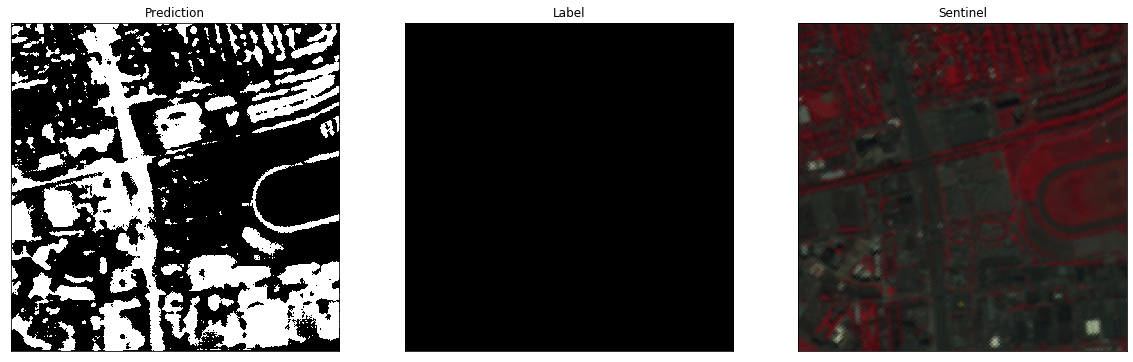

87


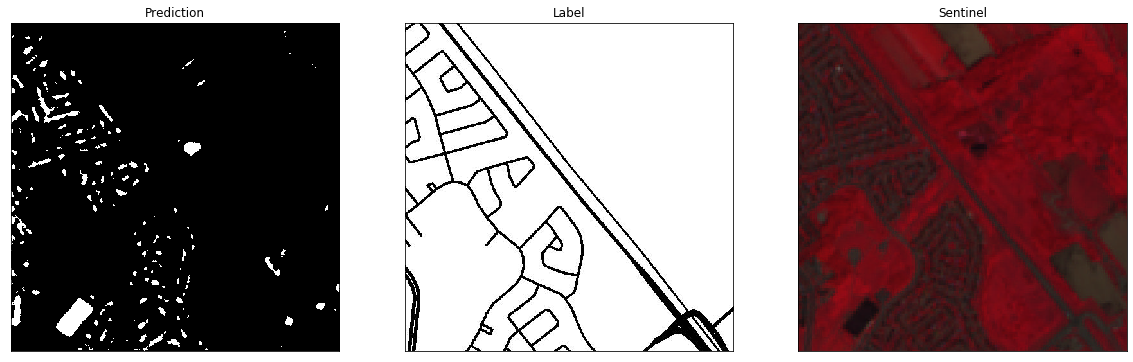

118


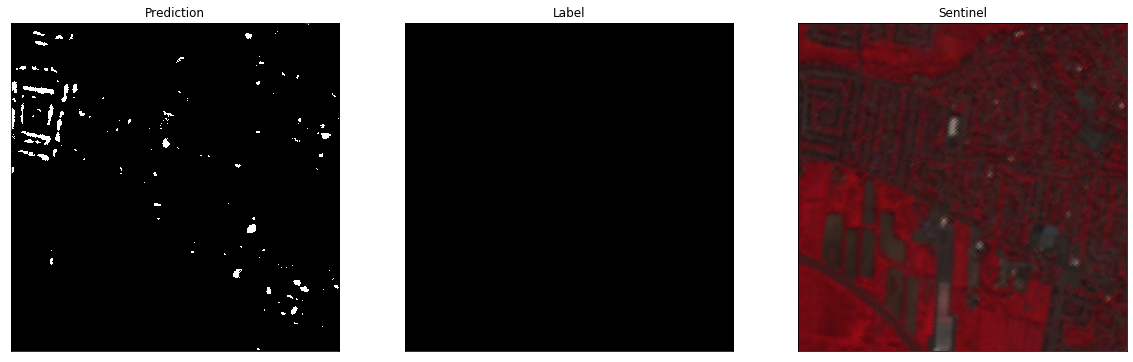

78


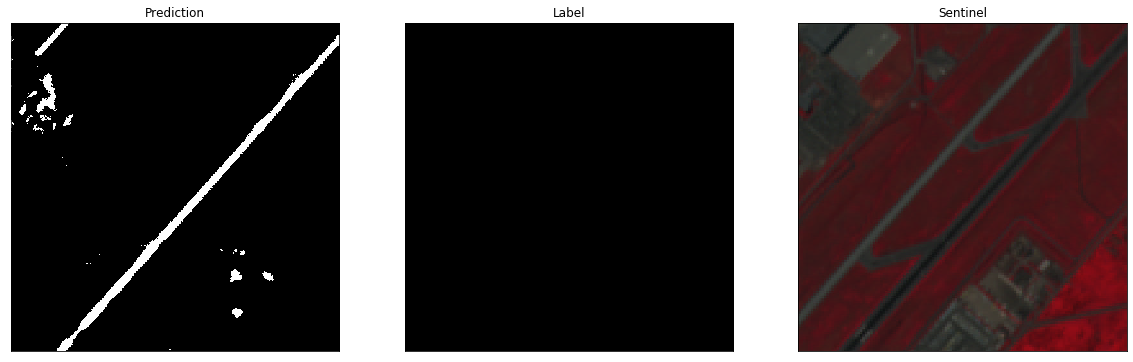

54


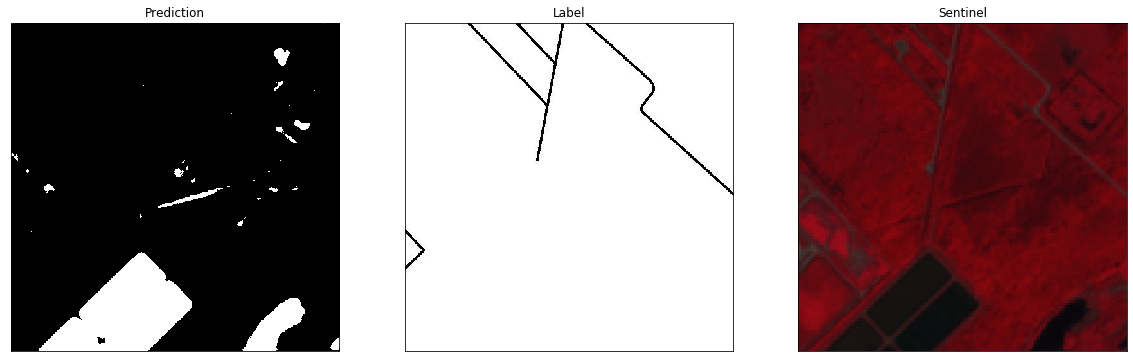

52


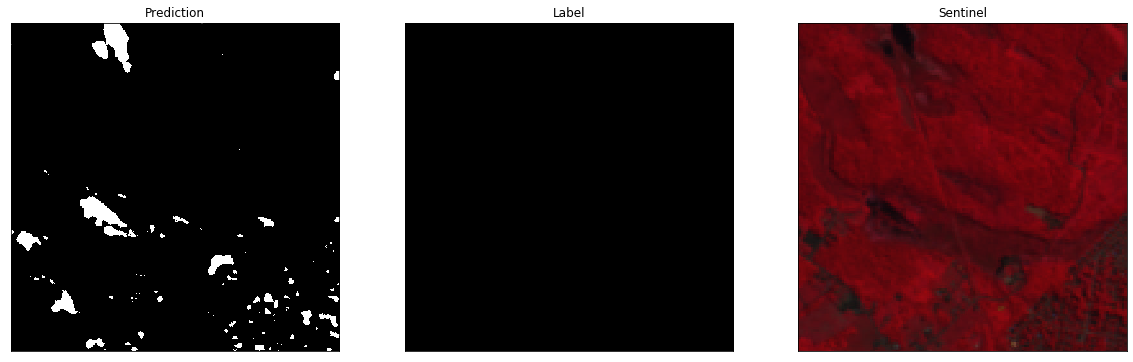

117


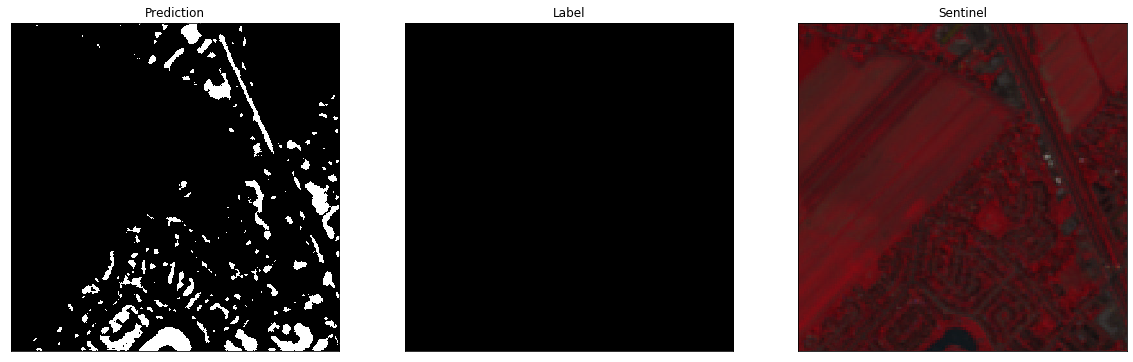

85


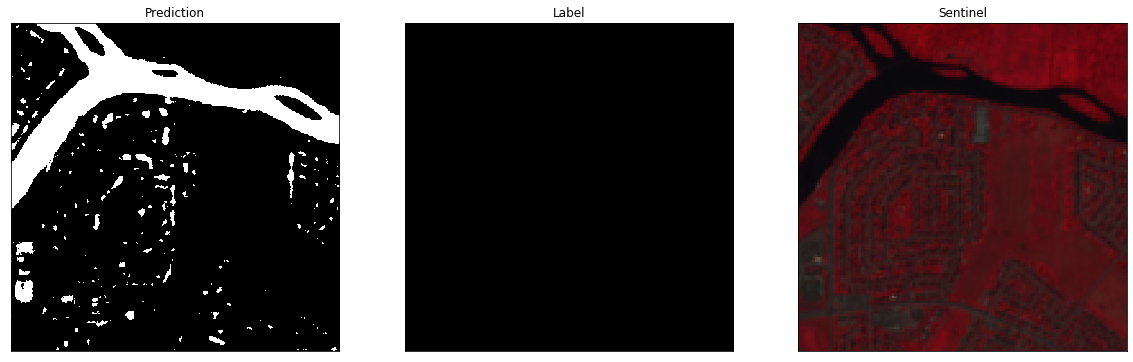

28


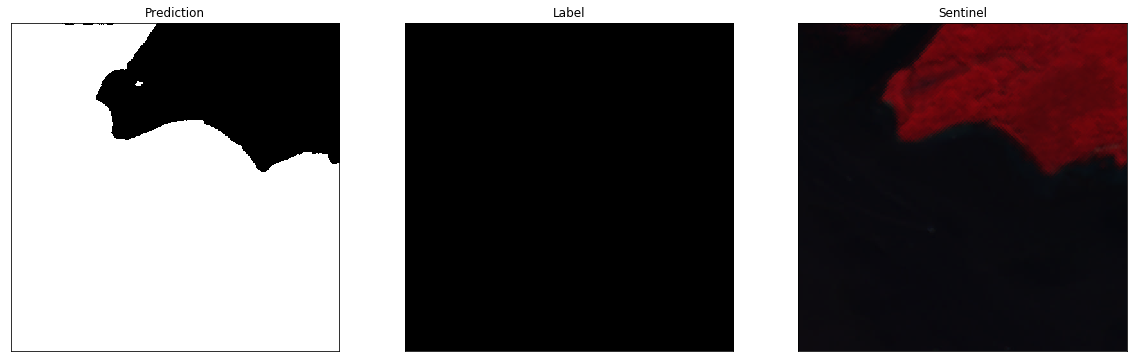

62


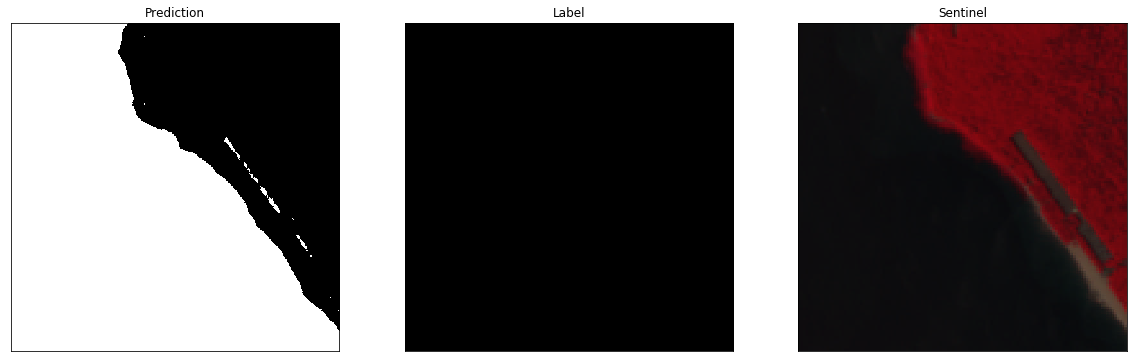

38


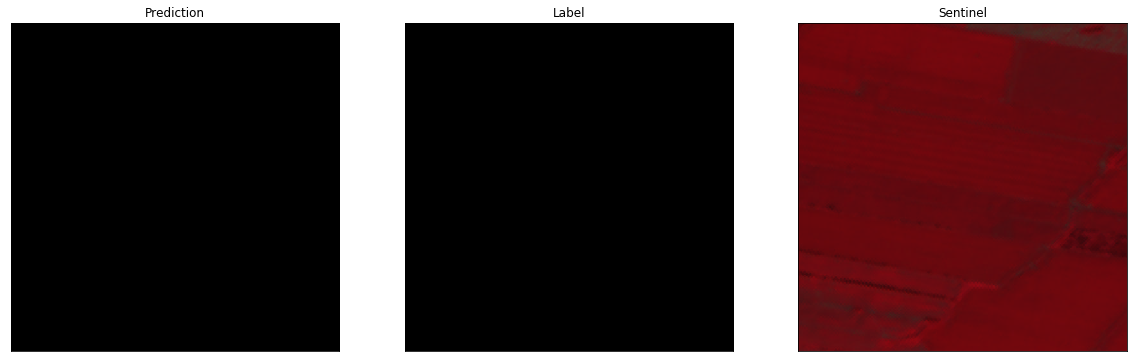

73


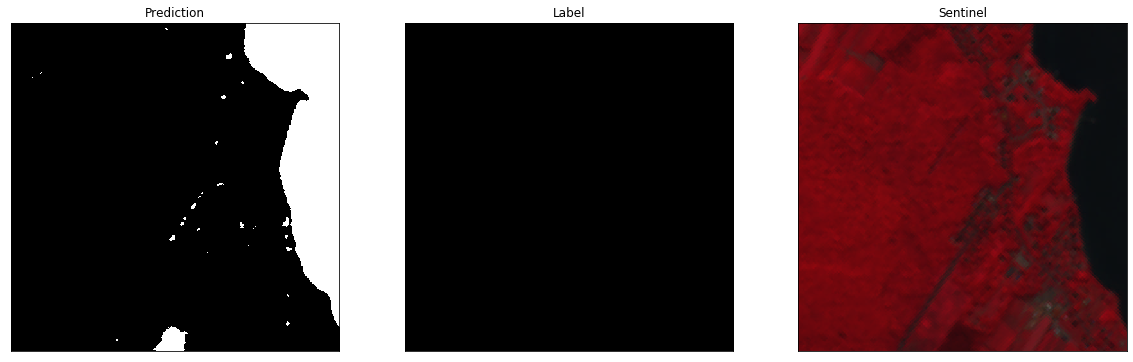

15


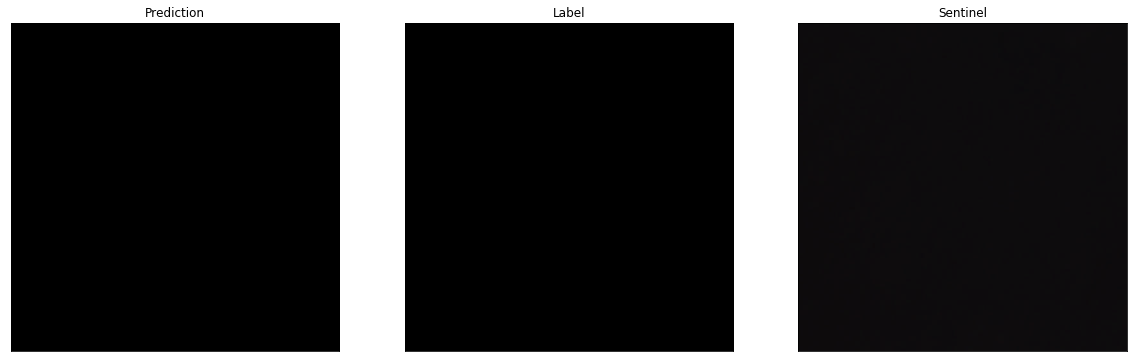

55


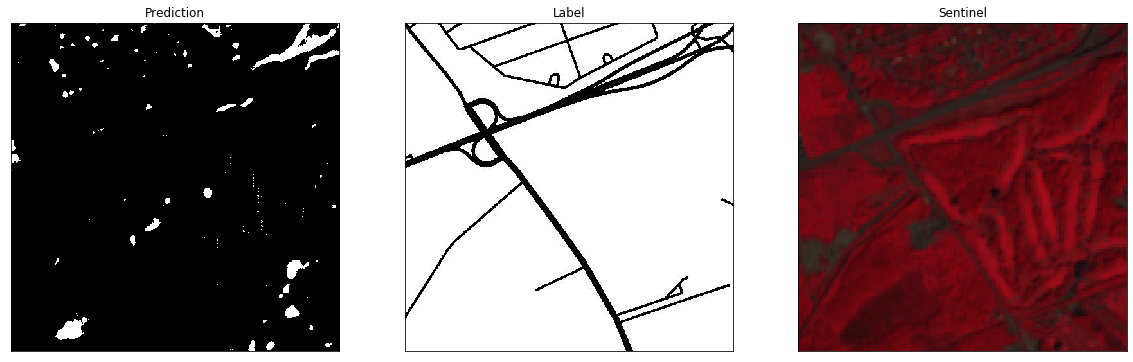

72


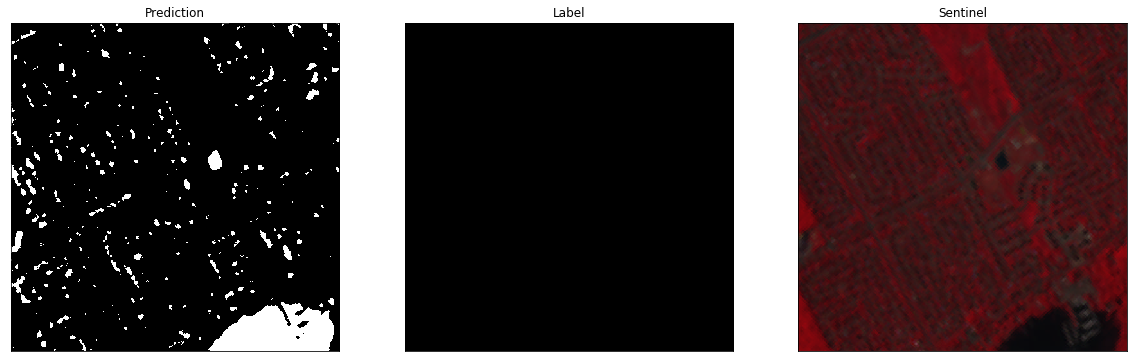

154


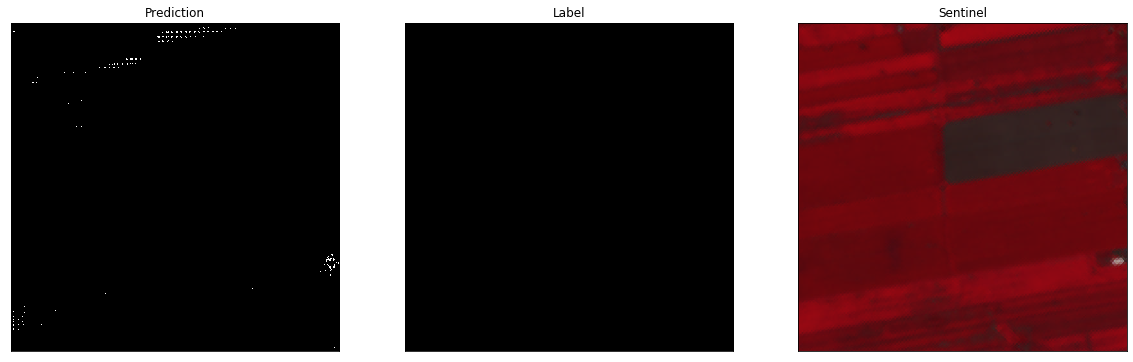

168


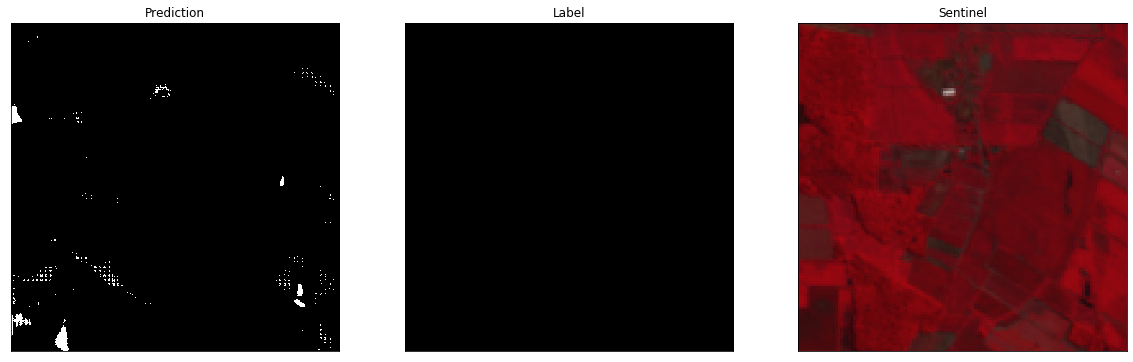

63


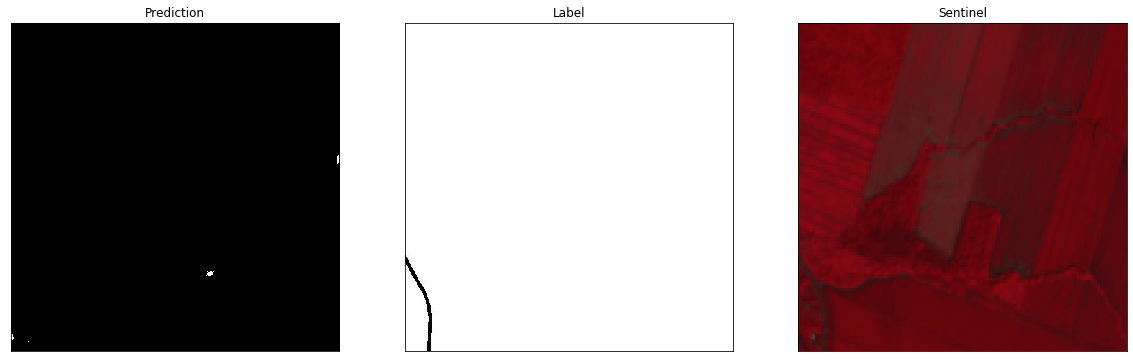

115


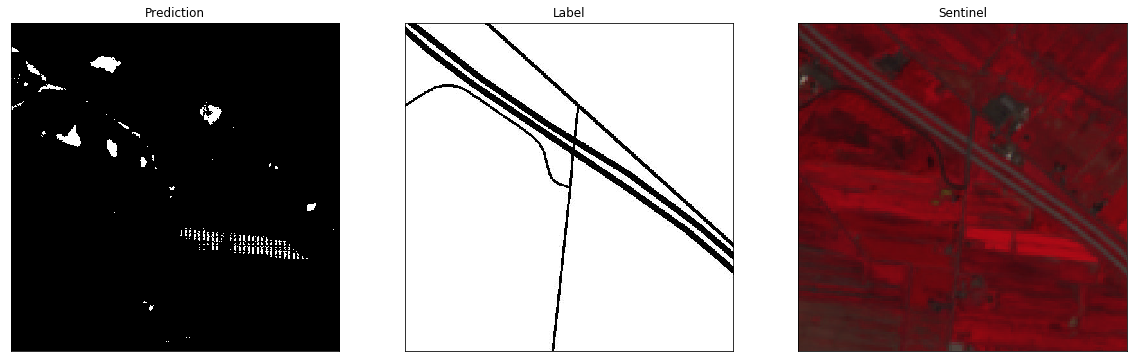

168


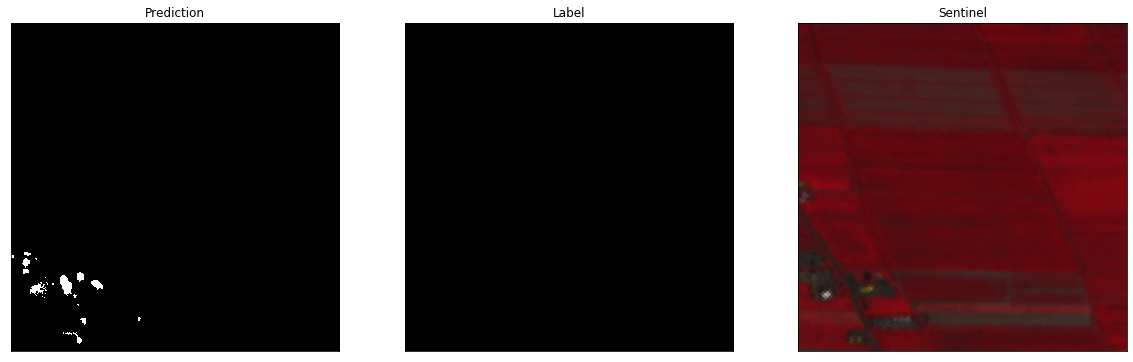

189


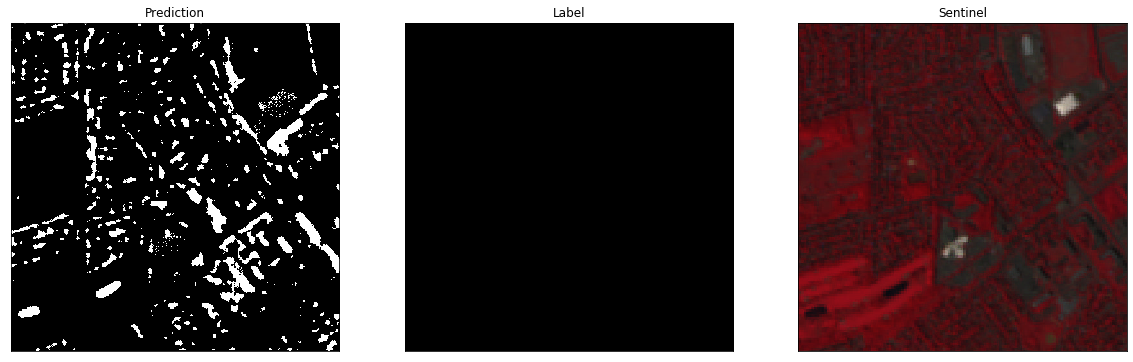

111


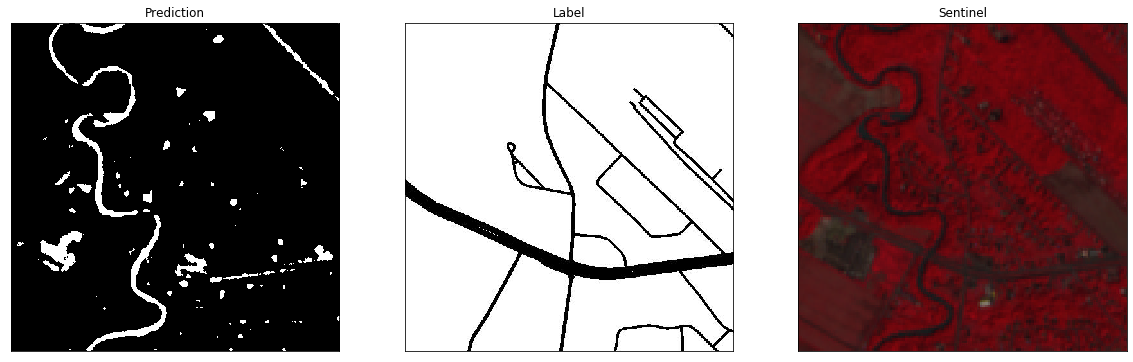

42


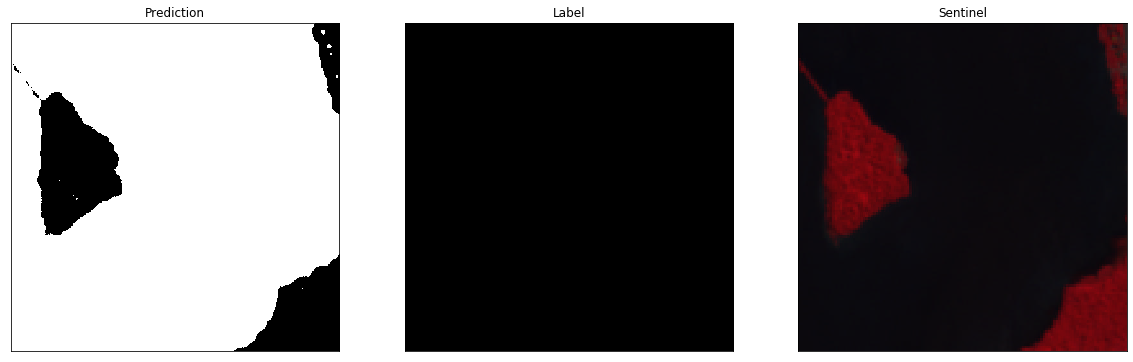

97


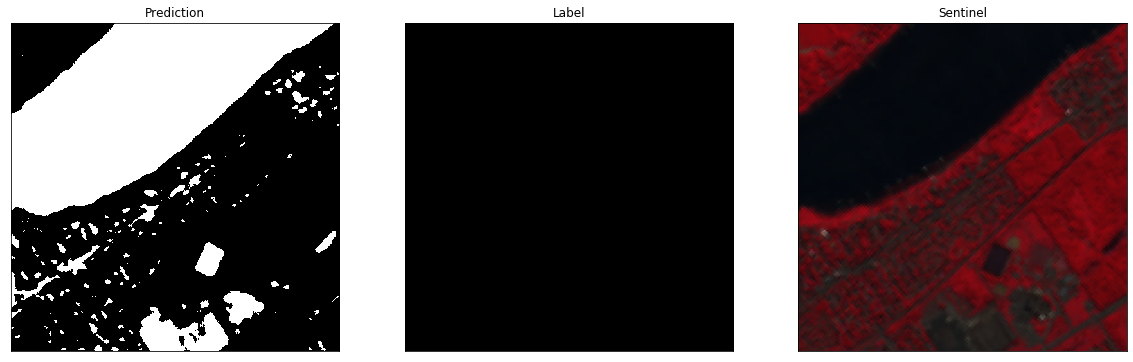

120


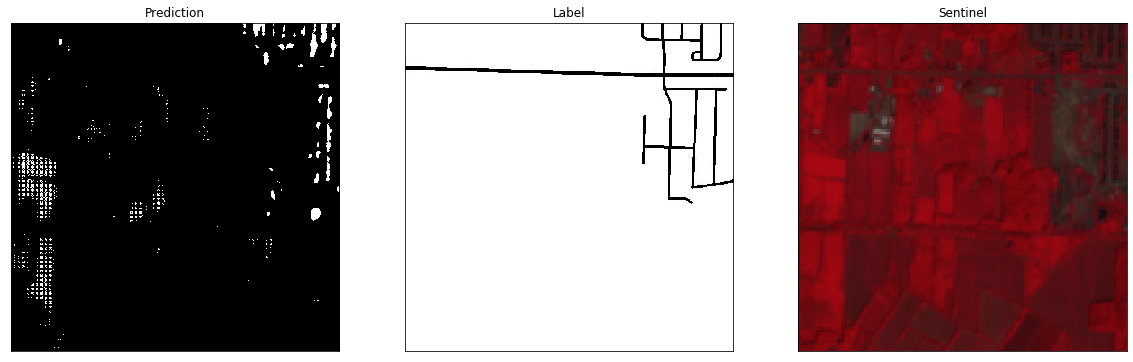

124


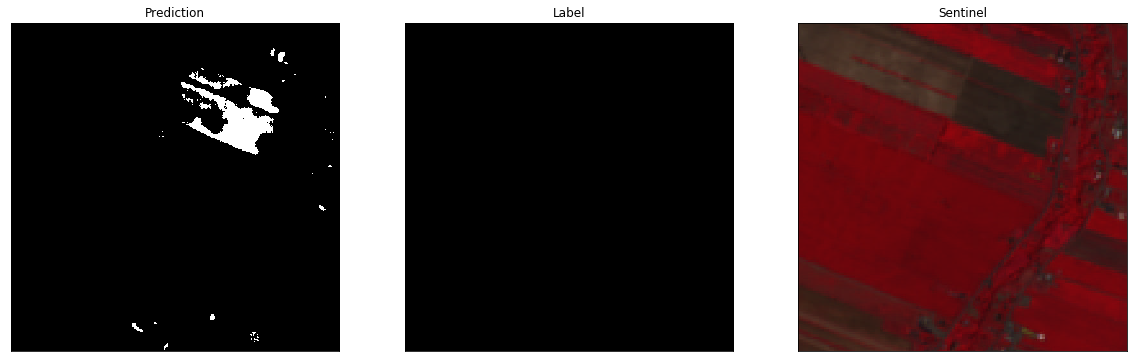

149


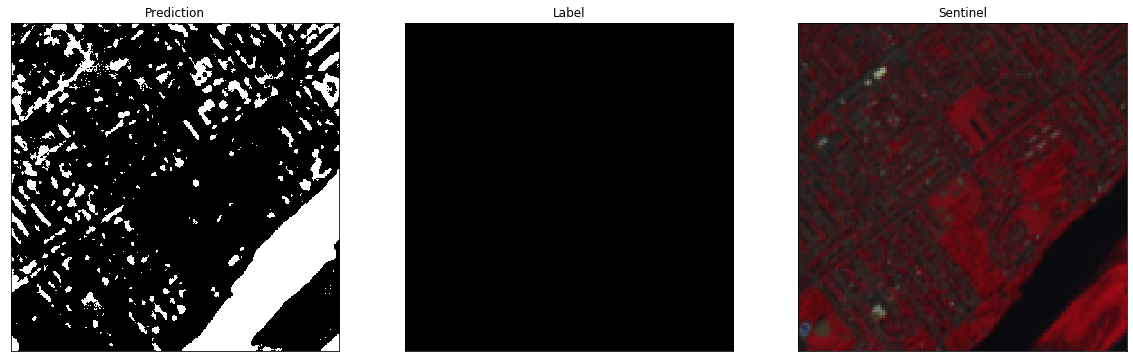

132


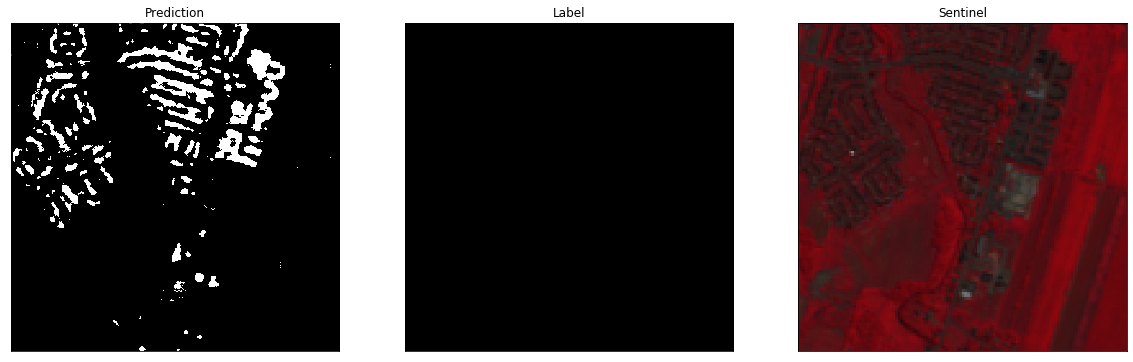

171


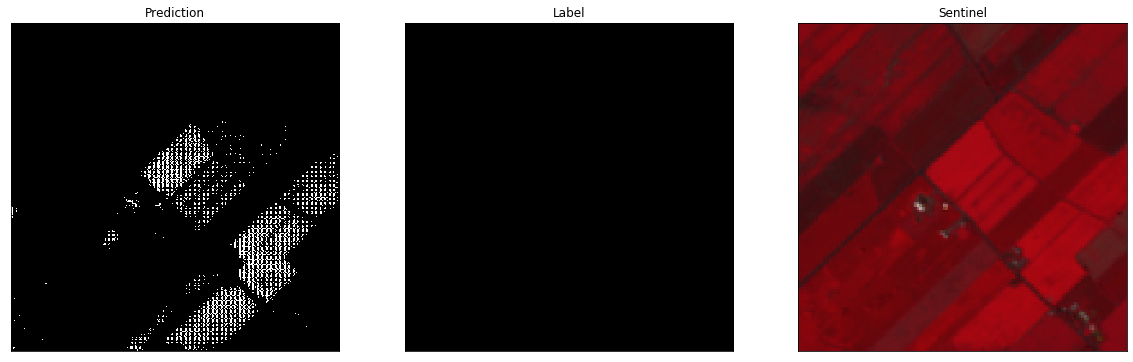

28


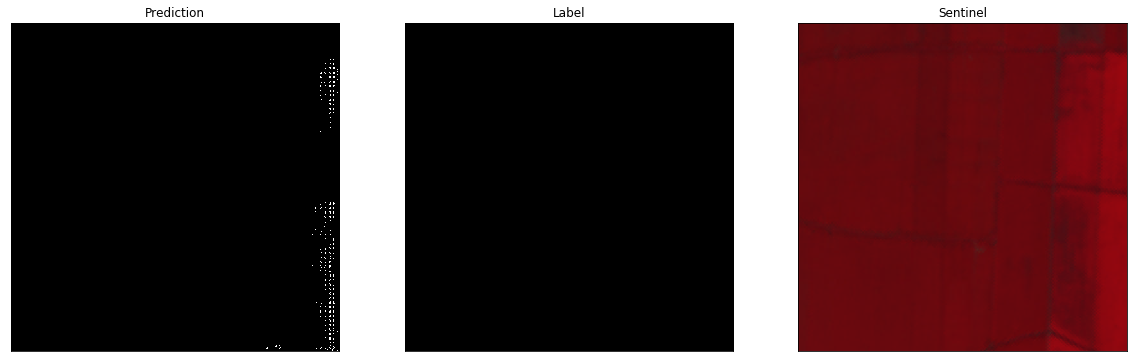

117


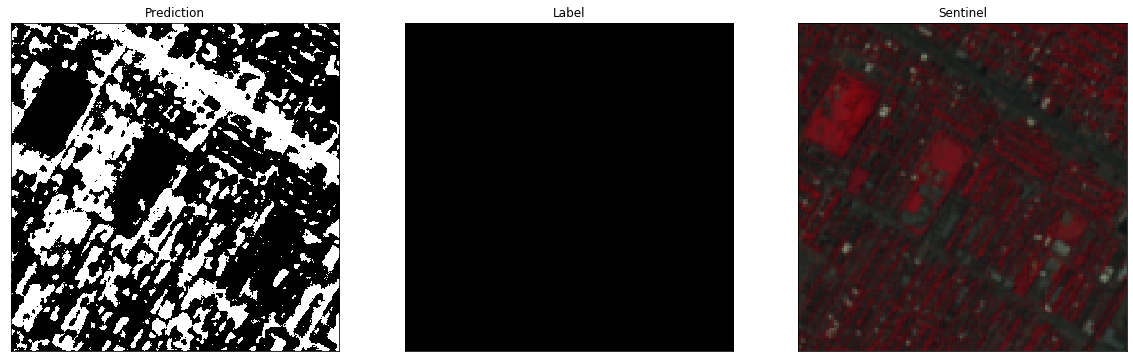

60


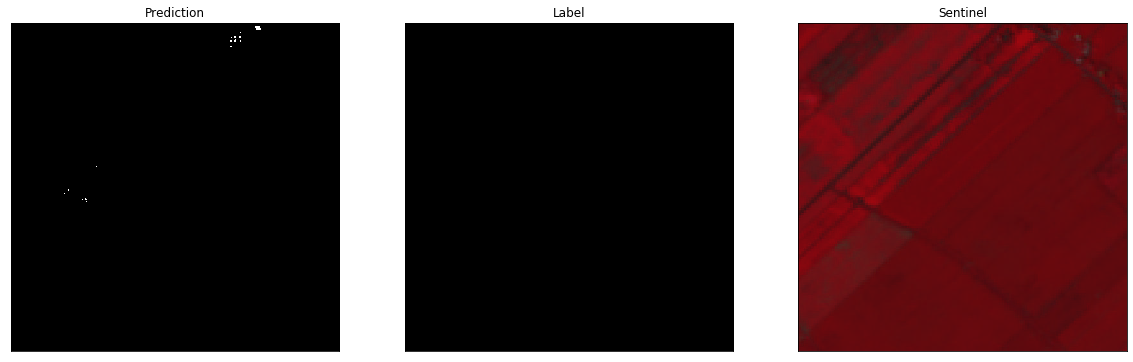

130


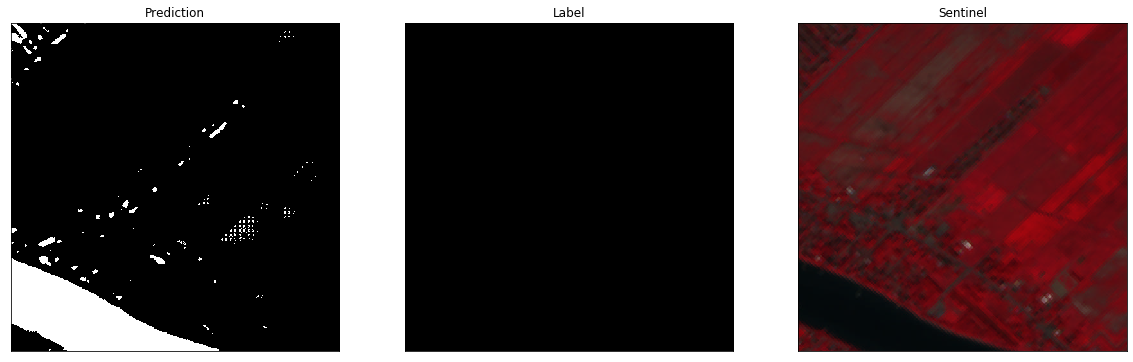

107


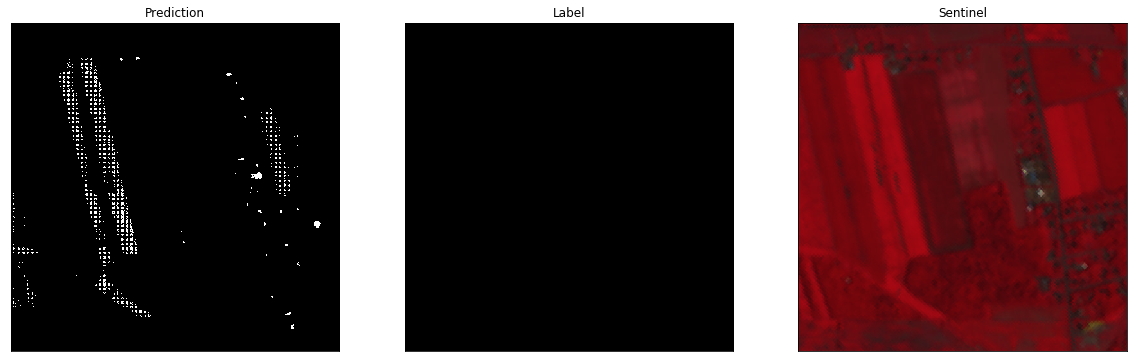

108


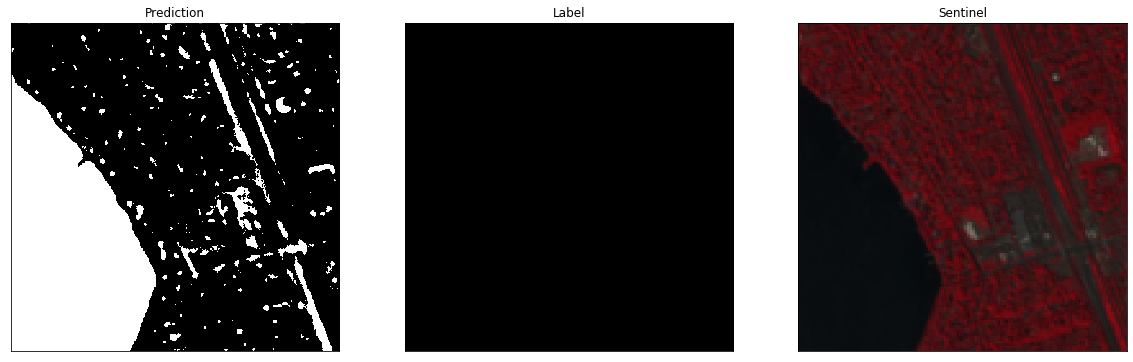

51


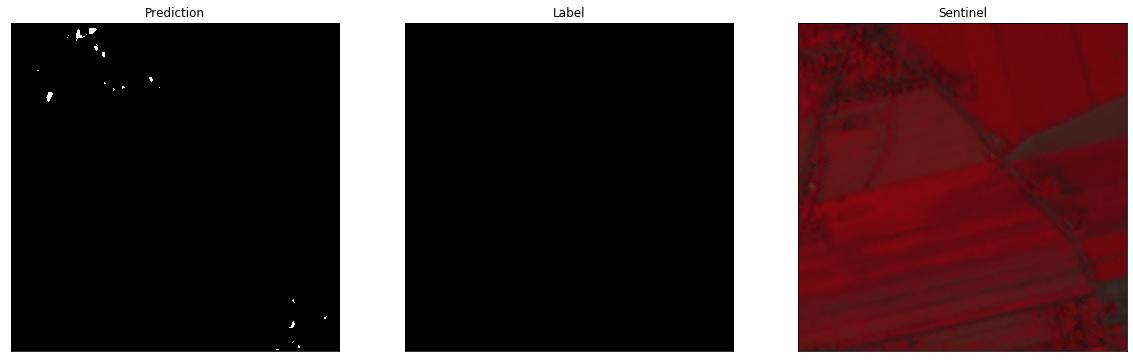

116


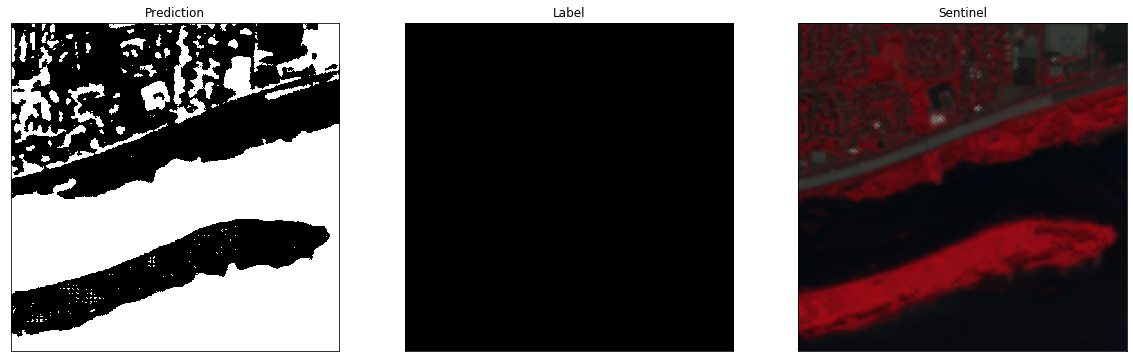

66


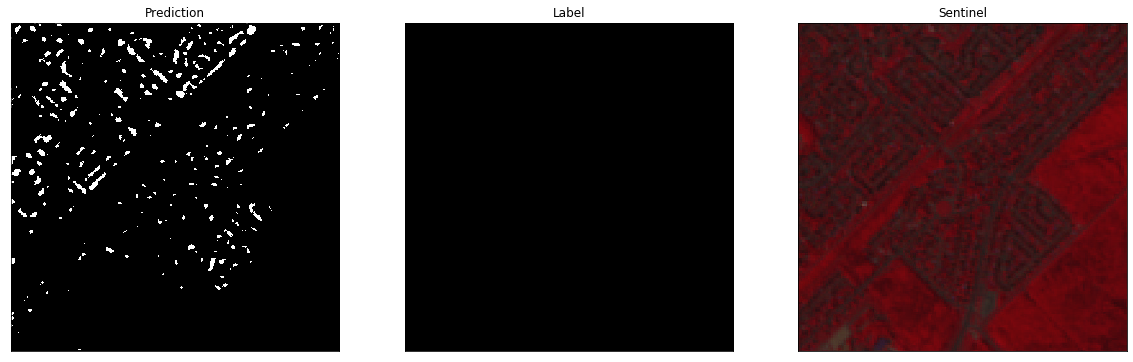

166


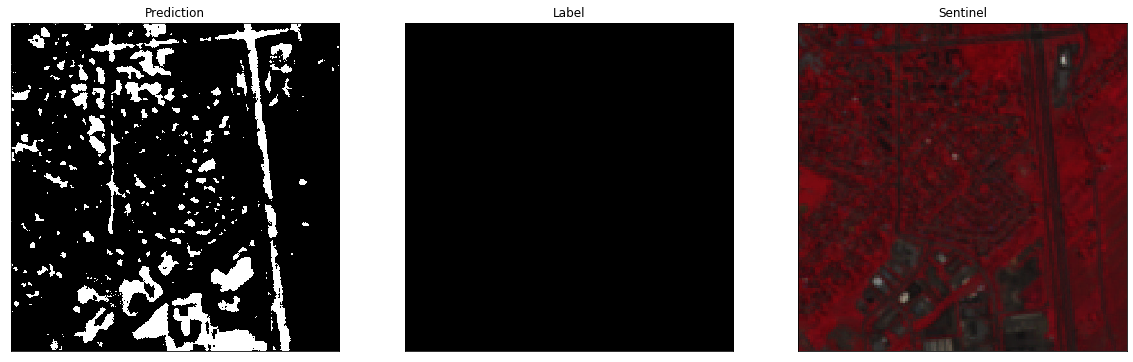

97


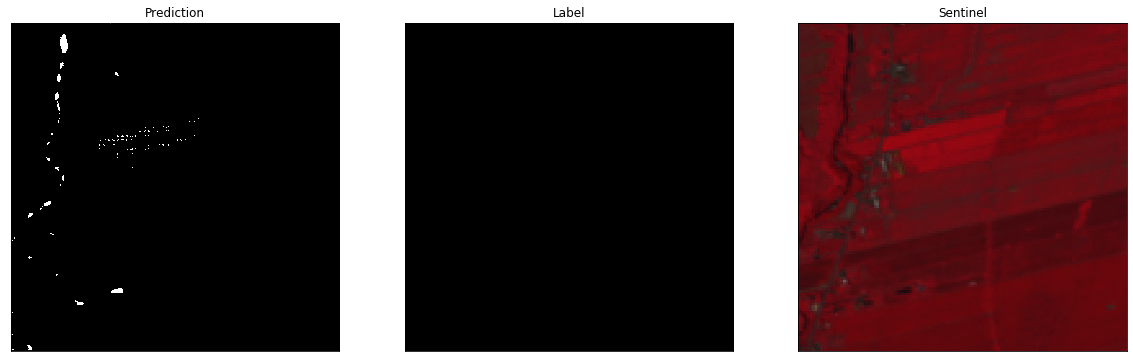

52


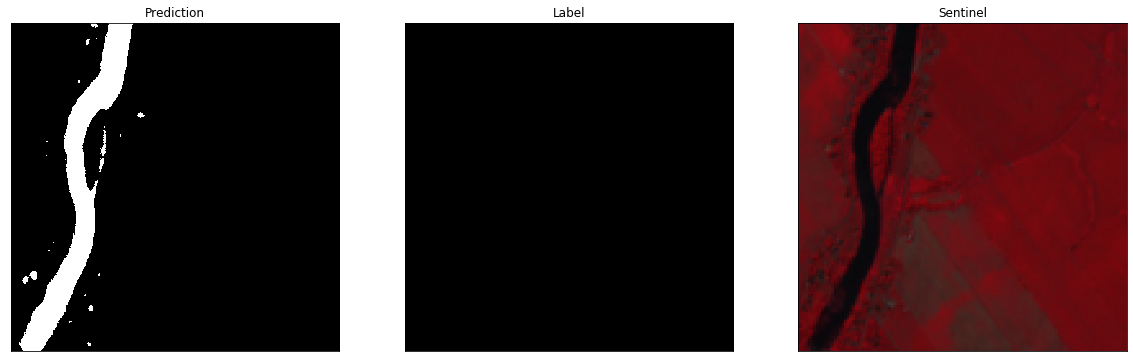

95


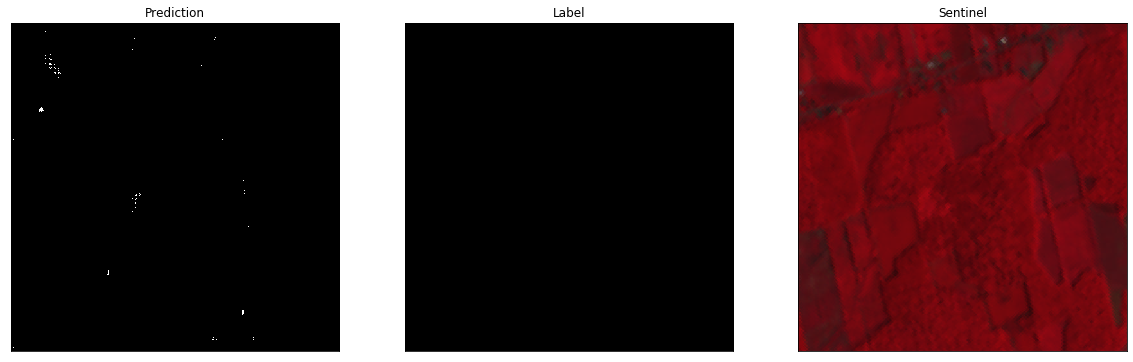

128


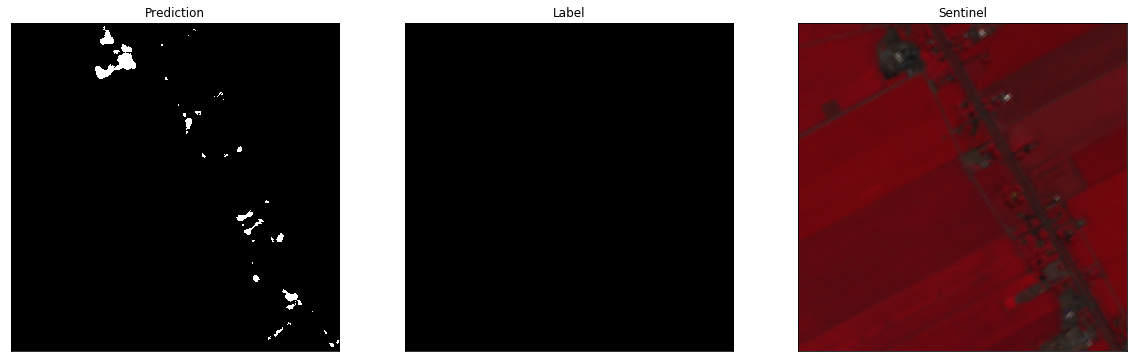

117


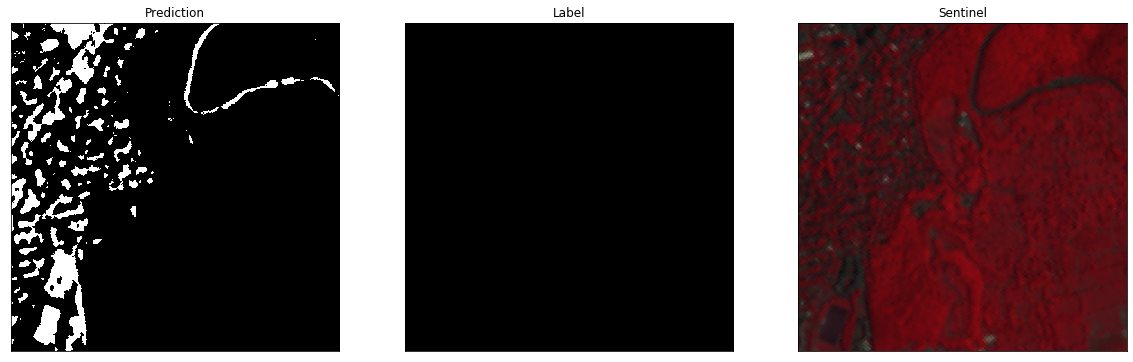

41


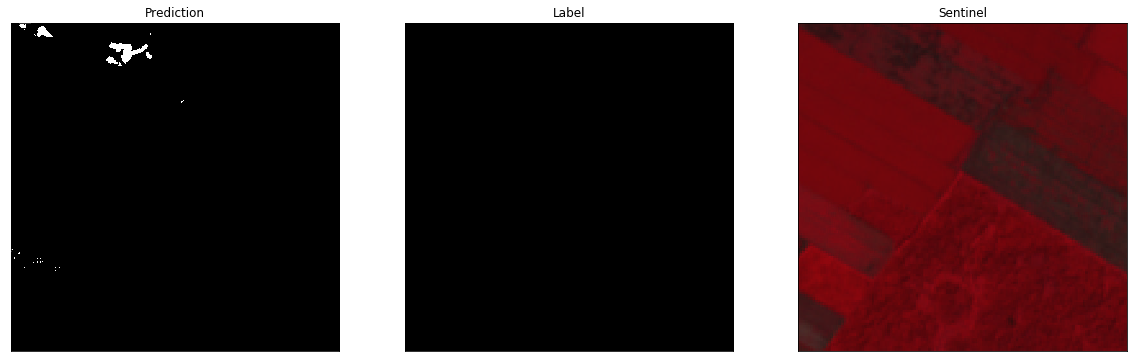

185


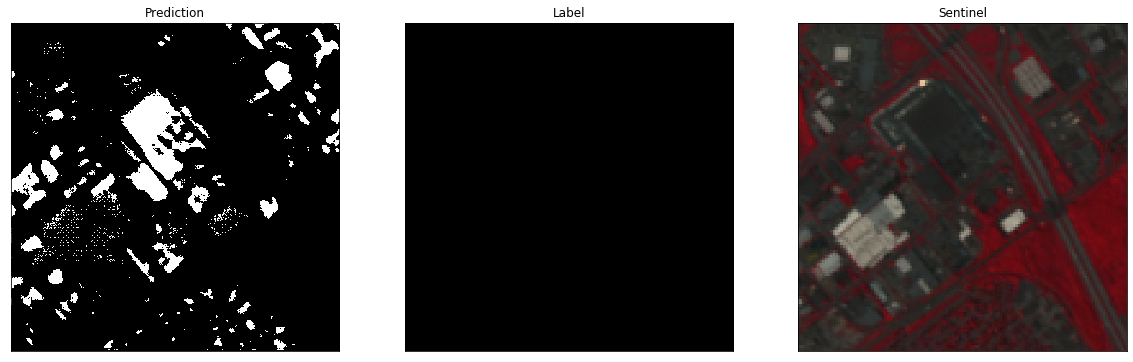

34


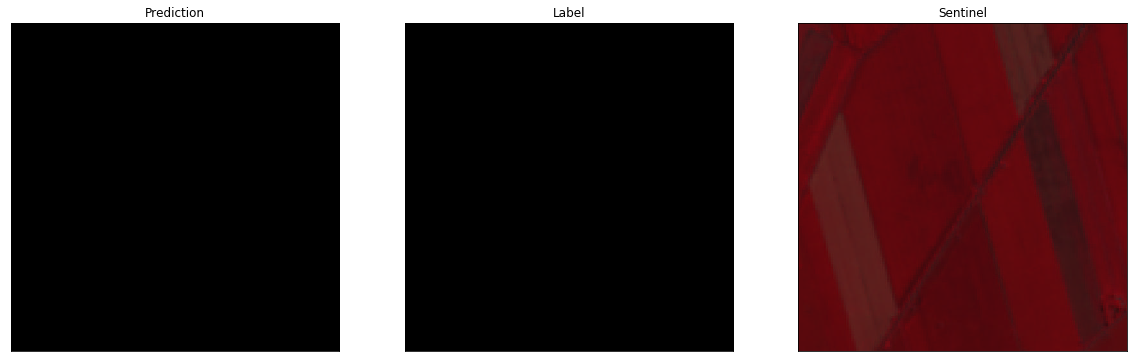

44


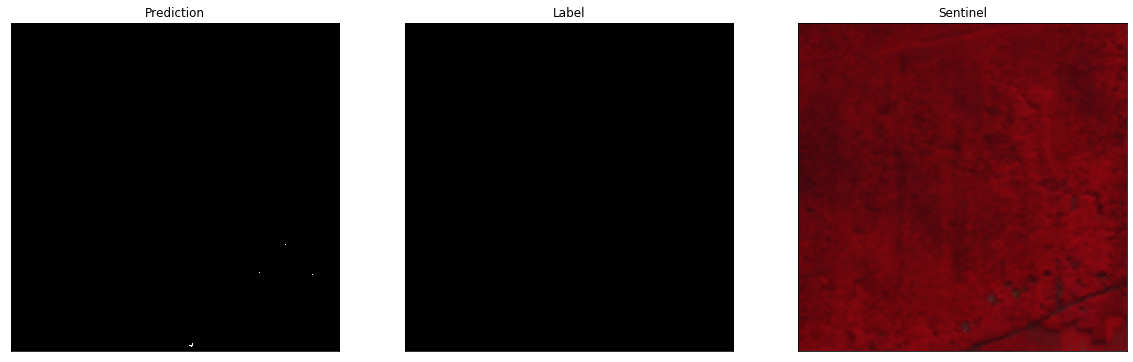

82


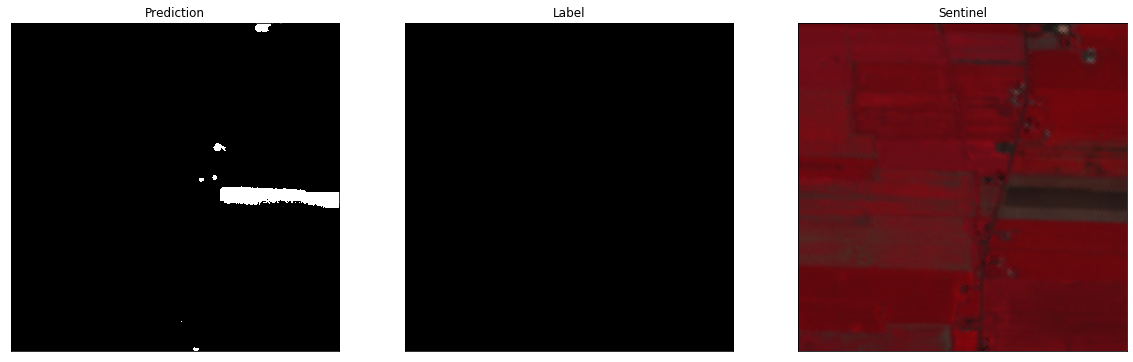

76


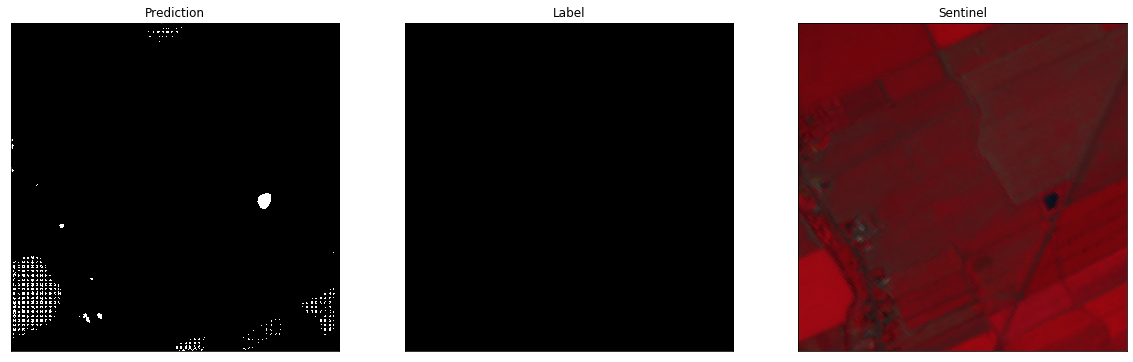

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import matplotlib

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [20, 20]

for i in range(limit):
    res = [idx for idx in file_list if idx.startswith("{}_".format(i))]
    f,ax = plt.subplots(1,3, gridspec_kw={'width_ratios': [10, 10, 10]})
    for file in res:
        if "predict" in file and "_2." in file:
            predict = mpimg.imread('{}/{}'.format(working_path, file))
            predict = predict > 0.5
            predict = predict.astype(int)
            ax[0].imshow(predict, cmap="gray")
            ax[0].set_title("Prediction")
        
        elif "b1" in file:
            # blue
            blue = mpimg.imread('{}/{}'.format(working_path, file))
            print(np.max(blue))
        
        elif "b2" in file:
            # green
            green = mpimg.imread('{}/{}'.format(working_path, file))
        
        elif "b3" in file:
            # red
            red = mpimg.imread('{}/{}'.format(working_path, file))
        
        elif "label" in file and "_0_0." in file:
            # label
            label = mpimg.imread('{}/{}'.format(working_path, file))
            ax[1].imshow(label, cmap="gray")
            ax[1].set_title("Label")
            
    sentinel_img = np.dstack((red, green, blue))
    ax[2].imshow(sentinel_img, cmap="magma")
    ax[2].set_title("Sentinel")
  
    for x in ax:
        x.set_xticks([])
        x.set_yticks([])
    
    plt.show()